### Disclaimer: Time Series alone cannot predict Stocks Prices, since its values are not predictive and mostly affected by real life occurances.

In [1]:
# libraries
from tensorflow.keras.layers import Input, LSTM, GRU, SimpleRNN, Dense, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
# read dataframe from the URL
data = pd.read_csv('https://raw.githubusercontent.com/Islambekkurakbay/Stock_Return_Prediction_LSTM/main/AMZN.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-03-09,78.175003,78.946999,77.954002,78.944504,78.944504,90686000
1,2018-03-12,79.629997,80.266502,79.334999,79.919502,79.919502,103484000
2,2018-03-13,80.797997,80.876999,78.900497,79.408997,79.408997,130638000
3,2018-03-14,79.849998,80.321999,79.544502,79.550003,79.550003,85188000
4,2018-03-15,79.750000,79.845497,78.905502,79.115997,79.115997,81394000


### Trying LSTM to predict Stock Close Prices

In [4]:
series = data['Close'].values.reshape(-1, 1)
print(series.shape)

(1258, 1)


In [5]:
# Normalize the data
scaler = StandardScaler()
scaler.fit(series[:len(series) // 2])
series = scaler.transform(series).flatten()

print(series.shape)

(1258,)


In [6]:
# build the dataset
T = 10
D = 1
X, Y = [], []

for i in range(len(series) - T):
  x = series[i:i+T]
  X.append(x)
  y = series[i+T]
  Y.append(y)

X = np.array(X).reshape(-1, T, 1)  # NxTxD
Y = np.array(Y)
N = len(X)
print(f"X.shape {X.shape} Y.shape {Y.shape}")

X.shape (1248, 10, 1) Y.shape (1248,)


In [7]:
# autoregressive RNN model
i = Input(shape = (T, 1))
x = LSTM(5)(i)
x = Dense(1)(x)

model = Model(i,x)
model.compile(
    loss = 'mse',
    optimizer = Adam(learning_rate=0.1),
)

r = model.fit(
    X[:-N//2], Y[:-N//2],
    epochs = 50,
    validation_data = (X[-N//2:], Y[-N//2:]),
)

Epoch 1/50
20/20 [==============================] - 5s 69ms/step - loss: 0.3787 - val_loss: 0.1750
Epoch 2/50
20/20 [==============================] - 0s 10ms/step - loss: 0.0282 - val_loss: 0.0315
Epoch 3/50
20/20 [==============================] - 0s 10ms/step - loss: 0.0117 - val_loss: 0.0483
Epoch 4/50
20/20 [==============================] - 0s 10ms/step - loss: 0.0116 - val_loss: 0.0374
Epoch 5/50
20/20 [==============================] - 0s 11ms/step - loss: 0.0114 - val_loss: 0.0382
Epoch 6/50
20/20 [==============================] - 0s 10ms/step - loss: 0.0114 - val_loss: 0.0542
Epoch 7/50
20/20 [==============================] - 0s 11ms/step - loss: 0.0110 - val_loss: 0.0389
Epoch 8/50
20/20 [==============================] - 0s 10ms/step - loss: 0.0143 - val_loss: 0.0513
Epoch 9/50
20/20 [==============================] - 0s 11ms/step - loss: 0.0121 - val_loss: 0.0370
Epoch 10/50
20/20 [==============================] - 0s 11ms/step - loss: 0.0113 - val_loss: 0.0687
Epoch 11/

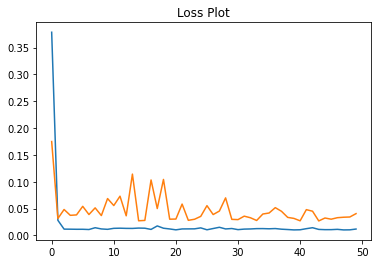

In [8]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.title('Loss Plot')

plt.show()

39/39 [==============================] - 1s 3ms/step
(1248, 1)


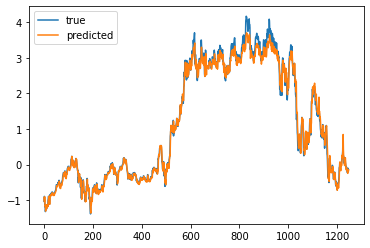

In [9]:
# One-step forecast seems good, but only learns for train data
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.plot(Y, label = 'true')
plt.plot(predictions, label = 'predicted')
plt.legend()
plt.show()

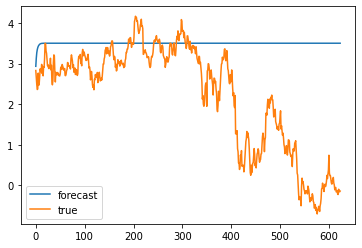

In [22]:
# Multi-step forecast is failed, because it can not find pattern for predicting
validation_target = Y[-N//2:]
validation_predictions = []

# last train input
last_x = X[-N//2]

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1,T,1))[0,0]

  validation_predictions.append(p)
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

plt.plot(validation_predictions, label = 'forecast')
plt.plot(validation_target, label = 'true')
plt.legend()
plt.show()

### Trying LSTM to predict Stock Close Return
This is the change of the prices from one day to the next

In [10]:
data['Previous Close'] = data['Close'].shift(1)
display(data)

,Date,Open,High,Low,Close,Adj Close,Volume,Previous Close
0,2018-03-09,78.175003,78.946999,77.954002,78.944504,78.944504,90686000,NaN
1,2018-03-12,79.629997,80.266502,79.334999,79.919502,79.919502,103484000,78.944504
2,2018-03-13,80.797997,80.876999,78.900497,79.408997,79.408997,130638000,79.919502
3,2018-03-14,79.849998,80.321999,79.544502,79.550003,79.550003,85188000,79.408997
4,2018-03-15,79.750000,79.845497,78.905502,79.115997,79.115997,81394000,79.550003
...,...,...,...,...,...,...,...,...
1253,2023-03-02,91.410004,92.230003,90.389999,92.129997,92.129997,55509400,92.169998
1254,2023-03-03,92.739998,94.940002,92.660004,94.900002,94.900002,55695300,92.129997
1255,2023-03-06,95.190002,96.550003,93.739998,93.750000,93.750000,52112400,94.900002
1256,2023-03-07,94.059998,95.089996,92.779999,93.550003,93.550003,49100700,93.750000


In [11]:
# calculating the return
data['Return'] = (data['Close'] - data['Previous Close']) / data['Previous Close']
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Previous Close,Return
0,2018-03-09,78.175003,78.946999,77.954002,78.944504,78.944504,90686000,NaN,NaN
1,2018-03-12,79.629997,80.266502,79.334999,79.919502,79.919502,103484000,78.944504,0.012350
2,2018-03-13,80.797997,80.876999,78.900497,79.408997,79.408997,130638000,79.919502,-0.006388
3,2018-03-14,79.849998,80.321999,79.544502,79.550003,79.550003,85188000,79.408997,0.001776
4,2018-03-15,79.750000,79.845497,78.905502,79.115997,79.115997,81394000,79.550003,-0.005456


<AxesSubplot:>

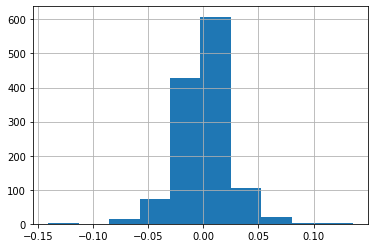

In [27]:
# hist
data['Return'].hist()

In [23]:
# Predicting Stock Return
data = data.iloc[1:]
series = data['Return'].values.reshape(-1, 1)
# print(series.shape)

# Normalize the data
scaler = StandardScaler()
scaler.fit(series[:len(series) // 2])
series = scaler.transform(series).flatten()
# print(series.shape)

# build the dataset
T = 10
D = 1
X, Y = [], []

for i in range(len(series) - T):
  x = series[i:i+T]
  X.append(x)
  y = series[i+T]
  Y.append(y)

X = np.array(X).reshape(-1, T, 1)  # NxTxD
Y = np.array(Y)
N = len(X)
print(f"X.shape {X.shape} Y.shape {Y.shape}")

X.shape (1246, 10, 1) Y.shape (1246,)


In [24]:
# autoregressive RNN model
i = Input(shape = (T, 1))
x = LSTM(5)(i)
x = Dense(1)(x)

model = Model(i,x)
model.compile(
    loss = 'mse',
    optimizer = Adam(learning_rate=0.1),
)

r = model.fit(
    X[:-N//2], Y[:-N//2],
    epochs = 50,
    validation_data = (X[-N//2:], Y[-N//2:]),
)

Epoch 1/50
20/20 [==============================] - 3s 40ms/step - loss: 1.0198 - val_loss: 1.3646
Epoch 2/50
20/20 [==============================] - 0s 11ms/step - loss: 1.0048 - val_loss: 1.3719
Epoch 3/50
20/20 [==============================] - 0s 12ms/step - loss: 0.9972 - val_loss: 1.3968
Epoch 4/50
20/20 [==============================] - 0s 19ms/step - loss: 0.9964 - val_loss: 1.3911
Epoch 5/50
20/20 [==============================] - 0s 20ms/step - loss: 0.9833 - val_loss: 1.4004
Epoch 6/50
20/20 [==============================] - 0s 23ms/step - loss: 0.9771 - val_loss: 1.3920
Epoch 7/50
20/20 [==============================] - 0s 22ms/step - loss: 0.9853 - val_loss: 1.4321
Epoch 8/50
20/20 [==============================] - 0s 20ms/step - loss: 0.9372 - val_loss: 1.5479
Epoch 9/50
20/20 [==============================] - 0s 22ms/step - loss: 0.9462 - val_loss: 2.3883
Epoch 10/50
20/20 [==============================] - 0s 15ms/step - loss: 1.0535 - val_loss: 1.3915
Epoch 11/

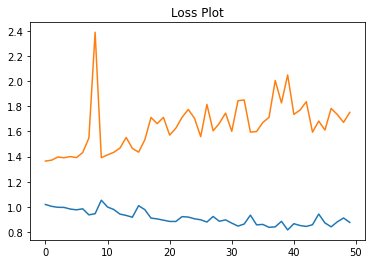

In [25]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.title('Loss Plot')

plt.show()

# according to the plot the model doesn't really learn, but instead fits the noise

39/39 [==============================] - 1s 2ms/step
(1246, 1)


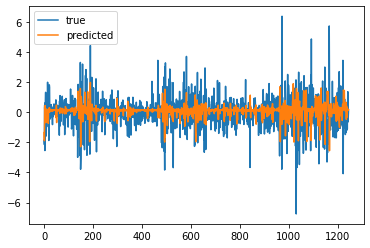

In [26]:
# One-step forecast
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.plot(Y, label = 'true')
plt.plot(predictions, label = 'predicted')
plt.legend()
plt.show()

1/1 [==============================] - 0s 26ms/step


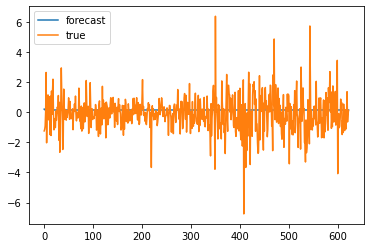

In [29]:
#@title
# Multi-step forecast
validation_target = Y[-N//2:]
validation_predictions = []
last_x = X[-N//2]

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1,T,1))[0,0]
  validation_predictions.append(p)
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

plt.plot(validation_predictions, label = 'forecast')
plt.plot(validation_target, label = 'true')
plt.legend()

### Trying Binary Classification to predict if the stocks price will go up or down
This problem is the easiest, if it could not be accomplished then Stock Price Prediction is just a baby babbling

In [65]:
# read dataframe from the URL
data = pd.read_csv('https://raw.githubusercontent.com/Islambekkurakbay/Stock_Return_Prediction_LSTM/main/AMZN.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-03-09,78.175003,78.946999,77.954002,78.944504,78.944504,90686000
1,2018-03-12,79.629997,80.266502,79.334999,79.919502,79.919502,103484000
2,2018-03-13,80.797997,80.876999,78.900497,79.408997,79.408997,130638000
3,2018-03-14,79.849998,80.321999,79.544502,79.550003,79.550003,85188000
4,2018-03-15,79.750000,79.845497,78.905502,79.115997,79.115997,81394000


In [66]:
data['Previous Close'] = data['Close'].shift(1)
data['Return'] = (data['Close'] - data['Previous Close']) / data['Previous Close']
data = data.iloc[1:]

input_data = data[['Open', 'High', 'Low', 'Close', 'Volume']].values
targets = data['Return'].values

In [67]:
None in input_data

False

In [68]:
# defining shapes
T = 10
D = input_data.shape[1]
N = len(input_data) - T

# normalize the data
scaler = StandardScaler()
scaler.fit(input_data[:len(input_data)*2//3 + T])
input_data = scaler.transform(input_data)

In [69]:
X_train = np.zeros((len(input_data)*2//3, T, D))
Y_train = np.zeros(len(input_data)*2//3)

for t in range(len(input_data)*2//3):
  X_train[t, :, :] = input_data[t:t+T]
  Y_train[t] = (targets[t+T] > 0)


In [80]:
X_test = np.zeros((N - len(input_data)*2//3, T, D))
Y_test = np.zeros(N - len(input_data)*2//3)

for i in range(N - len(input_data)*2//3):
  a = i + len(input_data)*2//3
  X_test[i, :, :] = input_data[a:a+T]
  Y_test[i] = (targets[a+T] > 0)

In [81]:
# compose a model
i = Input(shape = (T,D))
x = LSTM(50)(i)
x = Dense(1, activation = 'sigmoid')(x)

model = Model(i, x)
model.compile(
    loss='binary_crossentropy',
    optimizer = Adam(learning_rate=0.01),
    metrics = ['accuracy'],
)

In [82]:
r = model.fit(
    X_train, Y_train,
    epochs = 80,
    batch_size = 32,
    validation_data = (X_test, Y_test),
)

Epoch 1/80
27/27 [==============================] - 5s 38ms/step - loss: 0.7135 - accuracy: 0.5084 - val_loss: 0.6943 - val_accuracy: 0.5012
Epoch 2/80
27/27 [==============================] - 0s 13ms/step - loss: 0.6923 - accuracy: 0.5334 - val_loss: 0.6972 - val_accuracy: 0.4963
Epoch 3/80
27/27 [==============================] - 0s 12ms/step - loss: 0.6880 - accuracy: 0.5465 - val_loss: 0.7018 - val_accuracy: 0.4914
Epoch 4/80
27/27 [==============================] - 0s 13ms/step - loss: 0.6876 - accuracy: 0.5442 - val_loss: 0.7028 - val_accuracy: 0.4743
Epoch 5/80
27/27 [==============================] - 0s 11ms/step - loss: 0.6879 - accuracy: 0.5537 - val_loss: 0.7167 - val_accuracy: 0.4694
Epoch 6/80
27/27 [==============================] - 0s 11ms/step - loss: 0.6842 - accuracy: 0.5609 - val_loss: 0.7129 - val_accuracy: 0.4792
Epoch 7/80
27/27 [==============================] - 0s 12ms/step - loss: 0.6834 - accuracy: 0.5573 - val_loss: 0.7191 - val_accuracy: 0.4743
Epoch 8/80
27

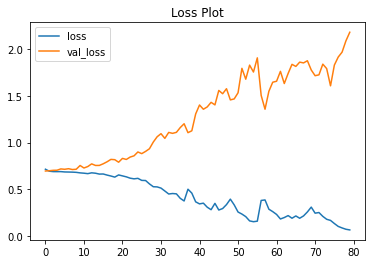

In [83]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()
plt.title("Loss Plot")
plt.show()

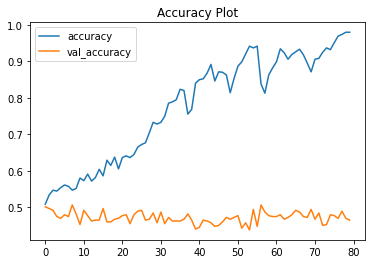

In [84]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Plot')
plt.legend()
plt.show()

Even the stock's next step magnitude could not be predicted.

### Practice. Predicting Random Walk

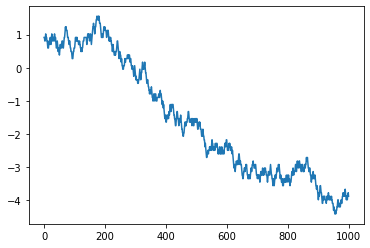

In [114]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt

x = []
def random_walk(steps = 1000, dir = (-1,0,1), origin = 0):
  for i in range(steps):
      origin += random.choice(dir)
      x.append(origin)
  return x

values = random_walk()
values = np.array(values).reshape(-1,1)

scaler = StandardScaler()
scaler.fit(values[:len(values)//2])
values = scaler.transform(values).flatten()

plt.plot(values)

In [117]:
T = 10
D = 1
X,Y = [],[]

for i in range(len(values) - T):
  x = values[i:i+T]  # first ten values
  X.append(x)
  y = values[i+T]   # eleventh value
  Y.append(y)

X = np.array(X).reshape(-1, T, 1)
Y = np.array(Y)
N = len(X)
print(f'X.shape {X.shape} Y.shape {Y.shape}')


X.shape (990, 10, 1) Y.shape (990,)


In [125]:
i = Input(shape = (T,1))
x = LSTM(5)(i)
x = Dense(1)(x)

model = Model(i,x)
model.compile(
    loss = 'mse',
    optimizer = Adam(learning_rate=0.1),
)

In [126]:
r = model.fit(
    X[:-N//2], Y[:-N//2],
    epochs = 100,
    validation_data = (X[-N//2:], Y[-N//2:]),
)

Epoch 1/100
16/16 [==============================] - 4s 47ms/step - loss: 0.1128 - val_loss: 2.0374
Epoch 2/100
16/16 [==============================] - 0s 13ms/step - loss: 0.0236 - val_loss: 2.9289
Epoch 3/100
16/16 [==============================] - 0s 12ms/step - loss: 0.0129 - val_loss: 1.5174
Epoch 4/100
16/16 [==============================] - 0s 12ms/step - loss: 0.0107 - val_loss: 1.3886
Epoch 5/100
16/16 [==============================] - 0s 12ms/step - loss: 0.0141 - val_loss: 1.3193
Epoch 6/100
16/16 [==============================] - 0s 12ms/step - loss: 0.0142 - val_loss: 1.0848
Epoch 7/100
16/16 [==============================] - 0s 12ms/step - loss: 0.0109 - val_loss: 1.0123
Epoch 8/100
16/16 [==============================] - 0s 11ms/step - loss: 0.0099 - val_loss: 0.8902
Epoch 9/100
16/16 [==============================] - 0s 12ms/step - loss: 0.0107 - val_loss: 0.8798
Epoch 10/100
16/16 [==============================] - 0s 13ms/step - loss: 0.0105 - val_loss: 0.7583

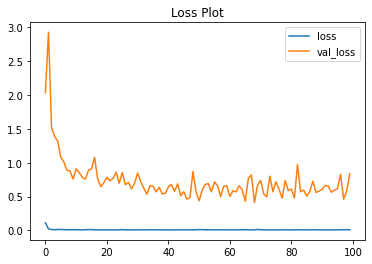

In [127]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.title("Loss Plot")
plt.legend()
plt.show()

16/16 [==============================] - 1s 3ms/step


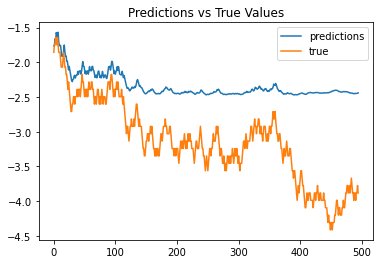

In [128]:
predictions = model.predict(X[-N//2:])
plt.plot(predictions, label = 'predictions')
plt.plot(Y[-N//2:], label = 'true')
plt.title("Predictions vs True Values")
plt.legend()
plt.show()

In [131]:
print(model.predict(X[-1:]))

1/1 [==============================] - 0s 44ms/step
[[-2.4404068]]
